# 1.Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da p1 e p2

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(481516)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

# Gerando o dataframe
df = pd.DataFrame({'p1': p1, 'p2': p2})

In [67]:
# Calculando média e diferença
df['média'] = df.mean(axis=1)
df['diferença'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença
0,"0,6","0,7","0,6","0,2"
1,"6,4","6,8","6,6","0,4"
2,"2,8","3,2","3,0","0,4"
3,"9,0","9,5","9,2","0,5"
4,"1,5","1,7","1,6","0,2"
5,"2,3","1,8","2,1","-0,5"
6,"9,4","8,9","9,1","-0,5"
7,"5,3","5,1","5,2","-0,2"
8,"0,9","1,8","1,3","0,9"
9,"9,9","9,7","9,8","-0,1"


In [68]:
# Calculando a correlação entre p1 e p2
corr_p1_p2 = df['p1'].corr(df['p2'])

# Calculando a correlação entre p1 e p2
corr_mean_diff = df['média'].corr(df['diferença'])

print(f'A correlação entre p1 e p2 é {corr_p1_p2}')
print(f'A correlação entre média e diferença é {corr_mean_diff}')


A correlação entre p1 e p2 é 0.9478294383805291
A correlação entre média e diferença é 0.029915676307636203


- Em respeito a correlação entre p1 e p2 vale dizer que esse valor diz que elas estão bem correlacionadas e que se uma aumenta outra também aumenta e assim também caso diminua.
<br>
<br>
- Já a média e a diferença não parecem estar relacionadas, isso indica nesse caso que se um aluno melhora a sua nota na p2, geralmente não está relacionado com as médias dele.

# 2.Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da p1 e p2. Construa o gráfico e conclua que diferenças visuais você observa.

In [69]:
# Calculando soma e diferença
soma = df['soma'] = df.sum(axis=1)
df.style.format(precision=1, decimal=',')


,p1,p2,média,diferença,soma
0,"0,6","0,7","0,6","0,2","2,1"
1,"6,4","6,8","6,6","0,4","20,1"
2,"2,8","3,2","3,0","0,4","9,5"
3,"9,0","9,5","9,2","0,5","28,2"
4,"1,5","1,7","1,6","0,2","5,1"
5,"2,3","1,8","2,1","-0,5","5,7"
6,"9,4","8,9","9,1","-0,5","26,8"
7,"5,3","5,1","5,2","-0,2","15,3"
8,"0,9","1,8","1,3","0,9","4,9"
9,"9,9","9,7","9,8","-0,1","29,3"


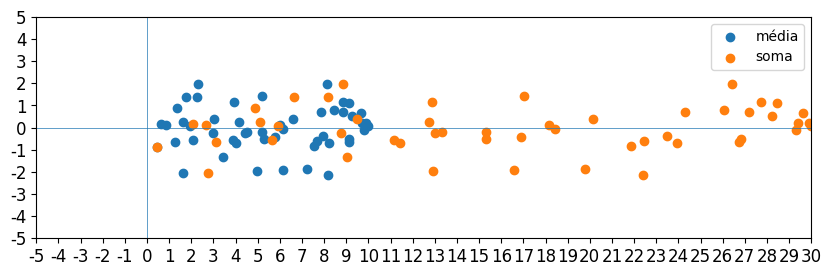

In [71]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(1,1,1)

xmin = -5
xmax = 30
ymin = -5
ymax = 5

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='-')
ax.axhline(0, linewidth=.5, linestyle='-')

# Plotar a média
plt.scatter(df['média'], df['diferença'], label='média')

# Plotar a soma
plt.scatter(df['soma'], df['diferença'], label='soma')

#Legenda
plt.legend()

A soma é como uma versão esticada do gráfico da média. Isso ocorre porque a soma é a média multiplicada por uma constante. Como resultado, a distribuição dos pontos é semelhante nos dois gráficos.